In [1]:
#data process
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import multiprocessing
import pandas as pd
import math
from bs4 import BeautifulSoup
import os
import json


In [3]:
test_dataset=pd.read_csv('full_test_data(Revised).csv')

train_dataset=pd.read_csv('full_train_data(Revised).csv')

# Convert date columns to datetime
test_dataset['date'] = pd.to_datetime(test_dataset['date'])
train_dataset['date'] = pd.to_datetime(train_dataset['date'])

# Filter datasets by year
test_dataset_2020 = test_dataset[test_dataset['date'].dt.year == 2020]
train_dataset_filtered = train_dataset[train_dataset['date'].dt.year.isin([2017, 2018, 2021, 2022])]

# (Optional) Display filtered datasets
print(test_dataset_2020.head())
print(train_dataset_filtered.head())



                                                title       date  \
4               the human cost trump guest worker ban 2020-06-29   
7   senate unanimously pass massive coronavirus ai... 2020-03-25   
23  esper break trump oppose using active duty tro... 2020-06-03   
26  the u.s. economy added 4.8 million job june, f... 2020-07-02   
40             bernie sander beat trump. here’s math. 2020-02-28   

                                     content_original  bias bias_text  \
4   on june 22nd, 2020, president donald trump iss...     0      left   
7   washington (ap) — house give final approval fr...     1    center   
23  washington (cnn) secretary defense mark esper ...     0      left   
26  hundred unemployed kentucky resident wait outs...     0      left   
40  to fully harness energy demographic revolution...     0      left   

                      source  
4                  The Verge  
7           Associated Press  
23            CNN (Web News)  
26           Washington Post

In [4]:
test_dataset = test_dataset_2020
train_dataset = train_dataset_filtered

In [5]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 4 to 5016
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             562 non-null    object        
 1   date              562 non-null    datetime64[ns]
 2   content_original  562 non-null    object        
 3   bias              562 non-null    int64         
 4   bias_text         562 non-null    object        
 5   source            562 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 30.7+ KB


In [6]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4787 entries, 3 to 20110
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             4787 non-null   object        
 1   date              4787 non-null   datetime64[ns]
 2   content_original  4787 non-null   object        
 3   bias              4787 non-null   int64         
 4   bias_text         4787 non-null   object        
 5   source            4787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 261.8+ KB


In [7]:
train_dataset.columns

Index(['title', 'date', 'content_original', 'bias', 'bias_text', 'source'], dtype='object')

In [8]:
from collections import Counter

# Assuming train_dataset['source'] is a list of publisher names
publisher_counts = Counter(train_dataset['source'])

# Sort publishers by total published counts in descending order
sorted_publishers = sorted(publisher_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 30 publishers
top_30_publishers = sorted_publishers

# Print or analyze the top 30 publishers and their total published counts
for publisher, count in top_30_publishers:
    print(f"Publisher: {publisher}, Total Published: {count}")


Publisher: Vox, Total Published: 465
Publisher: National Review, Total Published: 452
Publisher: Washington Times, Total Published: 441
Publisher: Reuters, Total Published: 363
Publisher: CNN (Web News), Total Published: 266
Publisher: Townhall, Total Published: 262
Publisher: Fox Online News, Total Published: 258
Publisher: Politico, Total Published: 235
Publisher: NPR Online News, Total Published: 217
Publisher: New York Times - News, Total Published: 217
Publisher: The Guardian, Total Published: 212
Publisher: Reason, Total Published: 200
Publisher: USA TODAY, Total Published: 136
Publisher: Fox News, Total Published: 119
Publisher: Daily Kos, Total Published: 94
Publisher: Christian Science Monitor, Total Published: 84
Publisher: Guest Writer - Right, Total Published: 80
Publisher: Breitbart News, Total Published: 75
Publisher: Newsmax, Total Published: 61
Publisher: TheBlaze.com, Total Published: 53
Publisher: Bloomberg, Total Published: 49
Publisher: CNN - Editorial, Total Publis

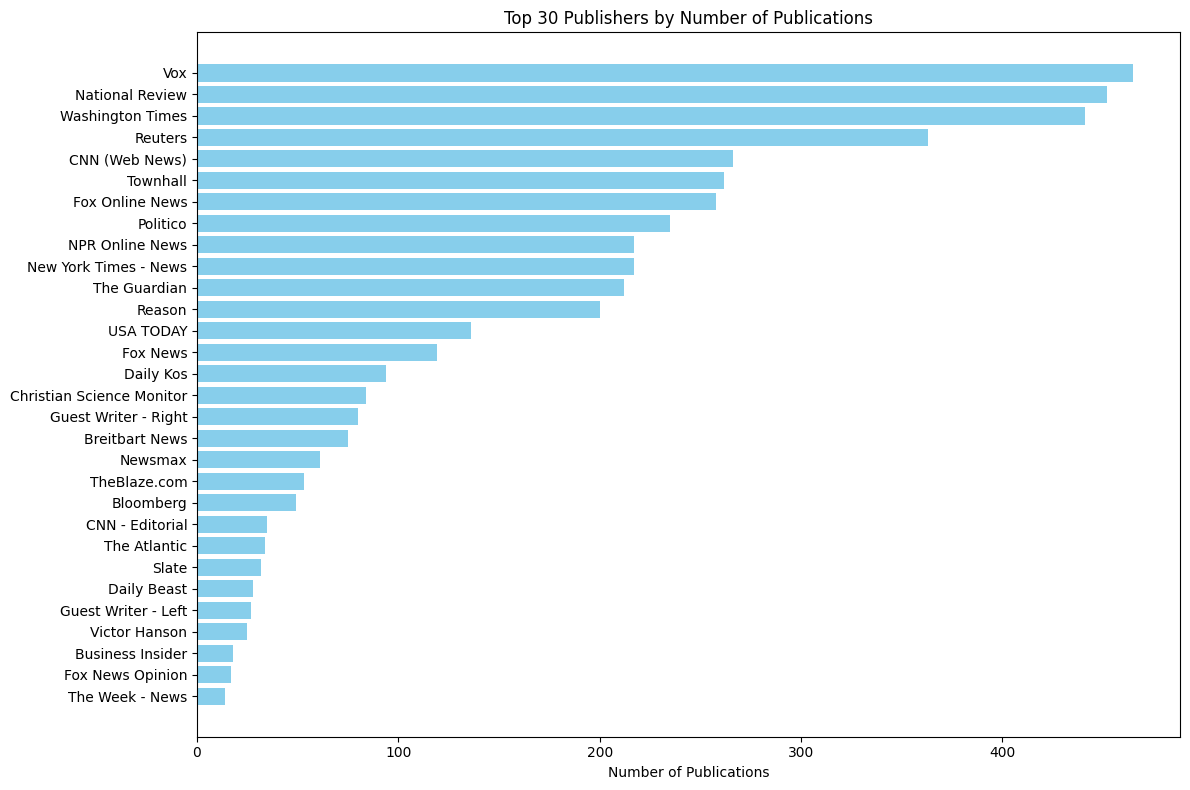

In [9]:
# Assuming train_dataset['source'] is a list of publisher names
publisher_counts = Counter(train_dataset['source'])

# Sort publishers by total published counts in descending order
sorted_publishers = sorted(publisher_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 30 publishers
top_30_publishers = sorted_publishers[:30]

# Extract data for plotting
publishers = [publisher for publisher, count in top_30_publishers]
counts = [count for publisher, count in top_30_publishers]

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(publishers, counts, color='skyblue')
plt.xlabel('Number of Publications')
plt.title('Top 30 Publishers by Number of Publications')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.tight_layout()
plt.show()

In [10]:

# Assuming train_dataset['source'] is a list of publisher names
publisher_counts = Counter(train_dataset['source'])

# Calculate total number of publications
total_publications = sum(publisher_counts.values())

# Sort publishers by total published counts in descending order
sorted_publishers = sorted(publisher_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 30 publishers
top_30_publishers = sorted_publishers[:30]

# Calculate sum of publications for top 30 publishers
sum_top_30_publications = sum(count for publisher, count in top_30_publishers)

# Calculate percentage
percentage_top_30 = (sum_top_30_publications / total_publications) * 100

print(f"The top 30 publishers account for {percentage_top_30:.2f}% of the total publications.")


The top 30 publishers account for 95.45% of the total publications.


In [11]:
# Assuming test_dataset['source'] is a list of publisher names
test_publisher_counts = Counter(test_dataset['source'])

# Sort publishers by total published counts in descending order
sorted_test_publishers = sorted(test_publisher_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 30 publishers
top_30_test_publishers = sorted_test_publishers

# Print or analyze the top 30 publishers and their total published counts
for publisher, count in top_30_test_publishers:
    print(f"Publisher: {publisher}, Total Published: {count}")

Publisher: Associated Press, Total Published: 43
Publisher: National Review, Total Published: 37
Publisher: Christian Science Monitor, Total Published: 35
Publisher: CNN (Web News), Total Published: 30
Publisher: NPR Online News, Total Published: 27
Publisher: Washington Times, Total Published: 24
Publisher: Reason, Total Published: 24
Publisher: Reuters, Total Published: 21
Publisher: Townhall, Total Published: 19
Publisher: Washington Post, Total Published: 18
Publisher: Vox, Total Published: 18
Publisher: Chicago Sun-Times, Total Published: 17
Publisher: The Guardian, Total Published: 16
Publisher: CNBC, Total Published: 16
Publisher: Yahoo! The 360, Total Published: 14
Publisher: Breitbart News, Total Published: 13
Publisher: New York Times - Opinion, Total Published: 11
Publisher: Politico, Total Published: 11
Publisher: MarketWatch, Total Published: 11
Publisher: NBC News (Online), Total Published: 11
Publisher: New York Times - News, Total Published: 10
Publisher: The Atlantic, 

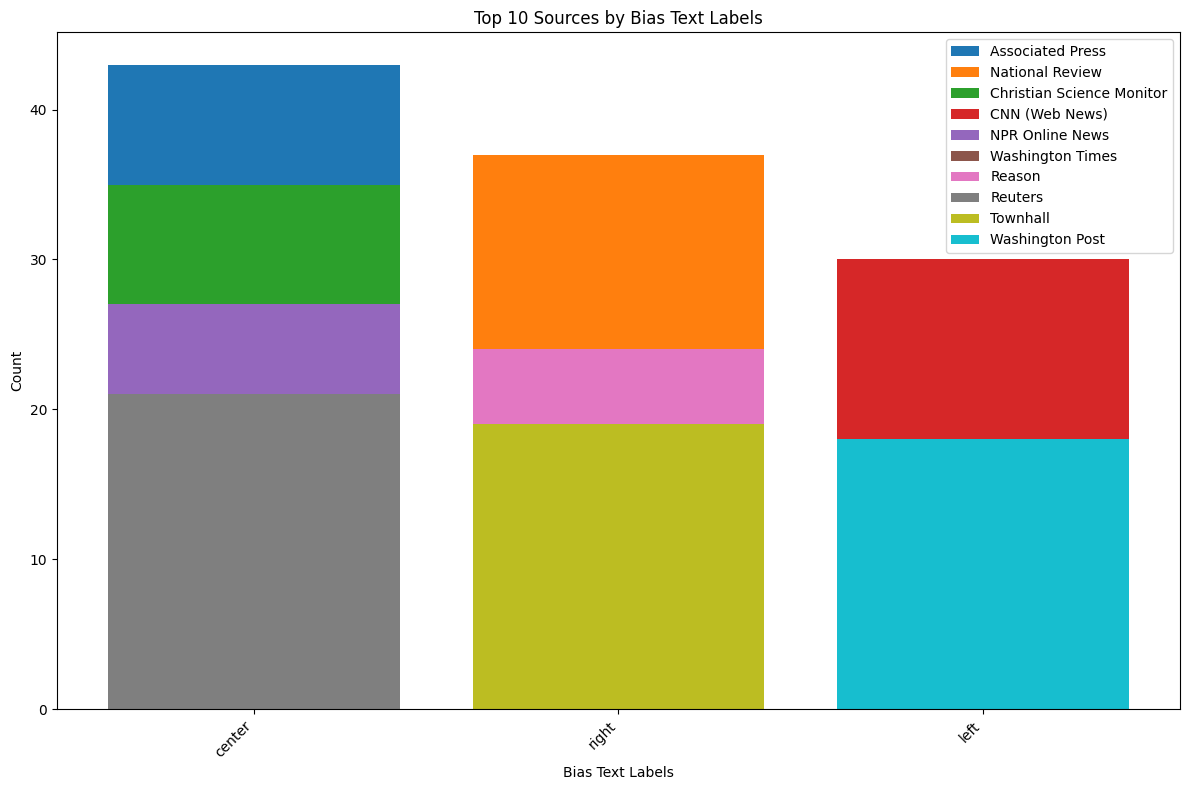

In [12]:

# Assuming test_dataset['source'] and test_dataset['bias_text'] are lists or arrays
sources = test_dataset['source']
bias_texts = test_dataset['bias_text']

# Count occurrences of each source
source_counts = Counter(sources)

# Sort sources by count in descending order and get the top 10 sources
top_10_sources = [source for source, count in source_counts.most_common(10)]

# Initialize a Counter for bias text labels
bias_label_counts = {source: Counter() for source in top_10_sources}

# Aggregate bias text labels for top 10 sources
for source, bias_text in zip(sources, bias_texts):
    if source in top_10_sources:
        bias_label_counts[source][bias_text] += 1

# Plotting the data
plt.figure(figsize=(12, 8))

for source in top_10_sources:
    labels, counts = zip(*bias_label_counts[source].items())
    plt.bar(labels, counts, label=source)

plt.xlabel('Bias Text Labels')
plt.ylabel('Count')
plt.title('Top 10 Sources by Bias Text Labels')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [13]:
# Assuming test_dataset['source'] and test_dataset['bias_text'] are lists or arrays
sources = test_dataset['source']
bias_texts = test_dataset['bias_text']

# Filter data where source is 'washington times'
washington_times_indices = [i for i, source in enumerate(sources) if source == 'washington times']
washington_times_bias_texts = [bias_texts[i] for i in washington_times_indices]

# Count occurrences of each bias text label for 'washington times'
bias_text_counts = Counter(washington_times_bias_texts)


In [14]:
washington=test_dataset[test_dataset['source']==' Washington Times']

In [15]:
washington = test_dataset[test_dataset['source'].str.strip() == 'Washington Times']


In [16]:
washington['bias_text'].unique()

array(['right'], dtype=object)

In [17]:
center=test_dataset[test_dataset['bias_text']=='center']

In [18]:
center['source'].unique()

array(['Associated Press', 'Reuters', 'Christian Science Monitor',
       'NPR Online News', 'The Week - News', 'Yahoo! The 360',
       'Pew Research Center', 'Business Insider', 'Bloomberg',
       'ProPublica', 'CNBC', 'Medium', 'FiveThirtyEight', 'Erraticus',
       'Brookings Institution', 'CalMatters',
       'The Reporters Committee for Freedom of the Press',
       'Concord Monitor', 'The Marshall Project', 'Foreign Policy',
       'PBS NewsHour', 'Misinformation Review', 'BBC News'], dtype=object)

#Balancing the Source

In [23]:
full_dataset =pd.read_csv('full_dataset(Revised).csv')

In [24]:
import pandas as pd
from collections import Counter
import random

# Assuming train_dataset is a pandas DataFrame and 'source' is the column with publisher names
publisher_counts = Counter(full_dataset['source'])

# List of publishers to modify
publishers_to_modify = [
    "Washington Times", "CNN (Web News)", "Politico", "NPR Online News",
    "Vox", "New York Times - News", "Townhall", "Christian Science Monitor",
    "National Review", "Reuters","Fox Online News", "The Guardian", "Reason", "Christian Science Monitor, Total Published",
    "Newsmax", "Fox News", "Salon", "USA TODAY", "Breitbart News"
]

# Number of rows to keep for modified publishers
num_rows_for_modified = 400

# Minimum number of papers for other publishers
min_papers = 10

# List to store the filtered data
filtered_data = []

# Process publishers
for publisher, count in publisher_counts.items():
    publisher_data = full_dataset[full_dataset['source'] == publisher]

    if publisher in publishers_to_modify:
        # For specified publishers, shuffle and keep 500 rows
        publisher_data = publisher_data.sample(frac=1, random_state=random.randint(0, 10000))
        filtered_data.append(publisher_data.head(num_rows_for_modified))
    elif count >= min_papers:
        # For other publishers with 10+ papers, keep all rows
        filtered_data.append(publisher_data)

# Combine the filtered data back into a single DataFrame
balanced_full_dataset = pd.concat(filtered_data, ignore_index=True)

# Now 'filtered_train_dataset' contains the modified data

In [25]:
a = Counter(balanced_full_dataset['source'])

# Sort publishers by total published counts in descending order
sorted_publishers = sorted(a.items(), key=lambda x: x[1], reverse=True)

# Get publishers
all_publishers = sorted_publishers

# Print or analyze the top 30 publishers and their total published counts
for publisher, count in all_publishers:
    print(f"Publisher: {publisher}, Total Published: {count}")

Publisher: Washington Times, Total Published: 400
Publisher: Salon, Total Published: 400
Publisher: CNN (Web News), Total Published: 400
Publisher: Fox Online News, Total Published: 400
Publisher: Townhall, Total Published: 400
Publisher: Politico, Total Published: 400
Publisher: New York Times - News, Total Published: 400
Publisher: NPR Online News, Total Published: 400
Publisher: Reason, Total Published: 400
Publisher: USA TODAY, Total Published: 400
Publisher: National Review, Total Published: 400
Publisher: Vox, Total Published: 400
Publisher: The Guardian, Total Published: 400
Publisher: Breitbart News, Total Published: 400
Publisher: Newsmax, Total Published: 400
Publisher: Reuters, Total Published: 400
Publisher: Christian Science Monitor, Total Published: 400
Publisher: Fox News, Total Published: 400
Publisher: Guest Writer - Right, Total Published: 373
Publisher: Associated Press, Total Published: 318
Publisher: Daily Beast, Total Published: 237
Publisher: TheBlaze.com, Total 

In [26]:
balanced_full_dataset.shape

(11058, 6)

In [31]:
balanced_full_dataset['date'] = pd.to_datetime(balanced_full_dataset['date'])

# Filter by year to create train and test datasets
train_df = balanced_full_dataset[balanced_full_dataset['date'].dt.year.isin([2017, 2018, 2021, 2022])]
test_df = balanced_full_dataset[balanced_full_dataset['date'].dt.year == 2020]

# Display the size of the training and test sets
print("\nSize of training set:", train_df.shape)
print("Size of test set:", test_df.shape)

# Save the splits to CSV files (adjust the paths accordingly)
train_df.to_csv('/content/drive/My Drive/Datasci_266_Final_Project/non_election_year_balanced_train_data(Revised).csv', index=False)
test_df.to_csv('/content/drive/My Drive/Datasci_266_Final_Project/election_year_balanced_test_data(Revised).csv', index=False)


Size of training set: (2858, 6)
Size of test set: (1830, 6)


In [30]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from sklearn.model_selection import train_test_split
# # Split the data into training and test sets
# train_df, test_df = train_test_split(balanced_full_dataset, test_size=0.3, random_state=42)

# # Display the size of the training and test sets
# print("\nSize of training set:", train_df.shape)
# print("Size of test set:", test_df.shape)

# # Save the splits to CSV files for later use
# train_df.to_csv('/content/drive/My Drive/Datasci_266_Final_Project/non_election_year_balanced_train_data(Revised).csv', index=False)
# test_df.to_csv('/content/drive/My Drive/Datasci_266_Final_Project/election_year_balanced_test_data(Revised).csv', index=False)


Size of training set: (7740, 6)
Size of test set: (3318, 6)
